# Financial Data Analysis

## Data Visualization

## Statistics

### Portfolio Optimization

Data

In [ ]:
#Importing Necessary Libraries
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
symbols = ['RELIANCE.NS', 'TCS.NS', 'WIPRO.NS', 'HDFCBANK.NS', 'BHARTIARTL.NS', 'HINDUNILVR.NS', 'LT.NS', 'SUNPHARMA.NS', 'TATAMOTORS.NS', 'NTPC.NS', 'ADANIENT.NS', 'ULTRACEMCO.NS', 'HAL.NS', 'ADANIPORTS.NS', 'DMART.NS', 'ASIANPAINT.NS', 'SIEMENS.NS']
rdata = yf.download(symbols, start="2019-07-30", end="2024-07-30")
noa = len(symbols) #Number of symbols
data = pd.DataFrame([rdata['Close'][i] for i in symbols]).transpose() #Creating a dataframe where each column contains the close prices of respective stocks in symbols list

[*********************100%%**********************]  17 of 17 completed


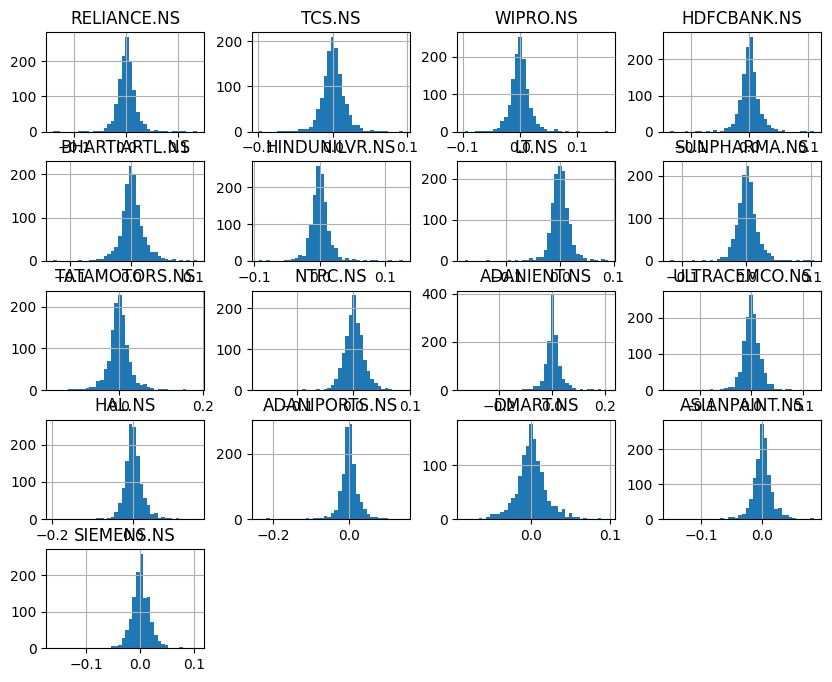

In [ ]:
rets = np.log(data / data.shift(1)) #Providing log returns... Why log? Log returns are often more normally distributed than simple returns, which can be beneficial for statistical analysis and modeling.
rets.hist(bins=40, figsize=(10, 8)); #Drawing histograms to see distribution... a wider spread of returns may indicate higher volatility, while a concentrated peak may suggest stability.

In [ ]:
rets.mean() * 252 #Annulized mean returns
rets.cov() * 252 #Annualized Covariance matrix...The covariance matrix for the financial instruments to be invested in is the central piece of the portfolio selection process.

,RELIANCE.NS,TCS.NS,WIPRO.NS,HDFCBANK.NS,BHARTIARTL.NS,HINDUNILVR.NS,LT.NS,SUNPHARMA.NS,TATAMOTORS.NS,NTPC.NS,ADANIENT.NS,ULTRACEMCO.NS,HAL.NS,ADANIPORTS.NS,DMART.NS,ASIANPAINT.NS,SIEMENS.NS
RELIANCE.NS,0.091831,0.026922,0.027651,0.035581,0.027280,0.022715,0.034907,0.024906,0.053491,0.026898,0.054656,0.035009,0.031286,0.048909,0.027403,0.027297,0.031683
TCS.NS,0.026922,0.061137,0.041998,0.020170,0.018654,0.018518,0.021689,0.016996,0.035752,0.013754,0.033108,0.023028,0.012733,0.026842,0.016370,0.018795,0.017914
WIPRO.NS,0.027651,0.041998,0.082255,0.023091,0.020037,0.020183,0.026279,0.018995,0.041528,0.020582,0.038508,0.027584,0.013003,0.030892,0.020321,0.019540,0.023524
HDFCBANK.NS,0.035581,0.020170,0.023091,0.076706,0.028311,0.018002,0.042225,0.018484,0.046910,0.024507,0.047118,0.036513,0.024405,0.045116,0.025029,0.024779,0.034028
BHARTIARTL.NS,0.027280,0.018654,0.020037,0.028311,0.090619,0.016084,0.030137,0.021440,0.040767,0.024394,0.043141,0.030323,0.018010,0.039987,0.019330,0.018807,0.028377
HINDUNILVR.NS,0.022715,0.018518,0.020183,0.018002,0.016084,0.057422,0.018312,0.015298,0.019343,0.008591,0.022419,0.023911,0.010229,0.020139,0.021704,0.029461,0.019184
LT.NS,0.034907,0.021689,0.026279,0.042225,0.030137,0.018312,0.085449,0.023779,0.060368,0.036789,0.053881,0.044479,0.040290,0.056467,0.028548,0.028506,0.046471
SUNPHARMA.NS,0.024906,0.016996,0.018995,0.018484,0.021440,0.015298,0.023779,0.069670,0.035967,0.021439,0.033230,0.022614,0.016234,0.030984,0.014251,0.014758,0.021969
TATAMOTORS.NS,0.053491,0.035752,0.041528,0.046910,0.040767,0.019343,0.060368,0.035967,0.204893,0.050353,0.088863,0.052366,0.052932,0.069030,0.044688,0.030317,0.052020
NTPC.NS,0.026898,0.013754,0.020582,0.024507,0.024394,0.008591,0.036789,0.021439,0.050353,0.087570,0.049490,0.029235,0.037882,0.050410,0.018616,0.014040,0.032830


# The Basic Theory

In [ ]:
weights = np.random.random(noa)
weights /= np.sum(weights)

In [ ]:
weights

array([0.06661983, 0.0113557 , 0.0708351 , 0.09613585, 0.06696808,
       0.06093765, 0.08084867, 0.00814574, 0.02850552, 0.01925608,
       0.04442994, 0.10652161, 0.03719516, 0.09466495, 0.10342442,
       0.08147665, 0.02267905])

In [ ]:
weights.sum()

1.0

In [ ]:
np.sum(rets.mean() * weights) * 252 #Annualized portfolio return given the portfolio weights

0.23976075278412196

In [ ]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights)) #Annualized portfolio variance given the portfolio weights.

0.038315311991363746

In [ ]:
math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))) #Annualized portfolio volatility given the portfolio weights.

0.19574297430907642

In [ ]:
def port_ret(weights):
 return np.sum(rets.mean() * weights) * 252

In [ ]:
def port_vol(weights):
 return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [ ]:
prets = []
pvols = []
for p in range (2500):
  weights = np.random.random(noa)
  weights /= np.sum(weights)
  prets.append(port_ret(weights))
  pvols.append(port_vol(weights))
prets = np.array(prets)
pvols = np.array(pvols)

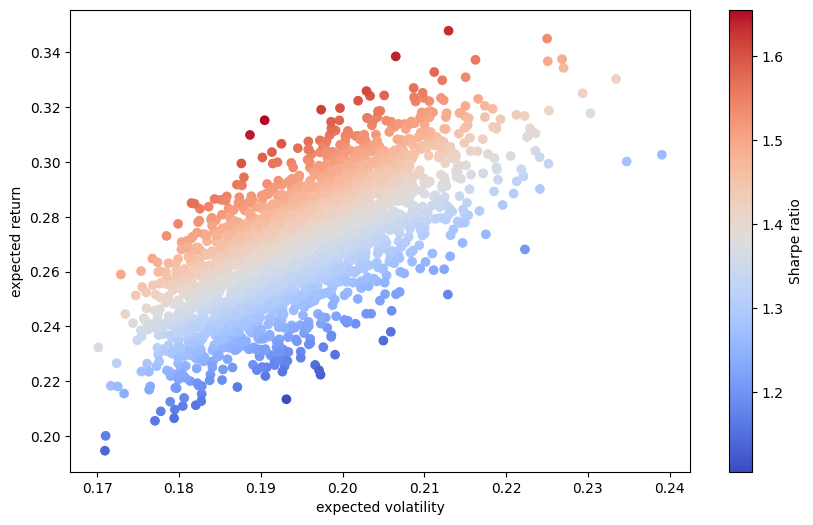

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');

# Optimal Portfolios

In [ ]:
import scipy.optimize as sco

In [ ]:
def min_func_sharpe(weights):
  return -port_ret(weights) / port_vol(weights)

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [ ]:
bnds = tuple((0, 1) for x in range(noa))

In [ ]:
eweights = np.array(noa * [1. / noa,])
eweights

array([0.05882353, 0.05882353, 0.05882353, 0.05882353, 0.05882353,
       0.05882353, 0.05882353, 0.05882353, 0.05882353, 0.05882353,
       0.05882353, 0.05882353, 0.05882353, 0.05882353, 0.05882353,
       0.05882353, 0.05882353])

In [ ]:
min_func_sharpe(eweights)

-1.4110748648092841

In [ ]:
%%time
opts = sco.minimize(min_func_sharpe, eweights, method='SLSQP', bounds=bnds, constraints=cons) #maximize sharpe ratio

CPU times: user 392 ms, sys: 1.93 ms, total: 394 ms
Wall time: 394 ms


In [ ]:
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.9185129414282194
       x: [ 0.000e+00  6.567e-18 ...  3.227e-17  1.224e-01]
     nit: 9
     jac: [ 3.235e-01  8.068e-02 ...  1.657e-01  2.469e-04]
    nfev: 167
    njev: 9

In [ ]:
opts['x'].round(3)

array([0.   , 0.   , 0.   , 0.   , 0.146, 0.   , 0.   , 0.25 , 0.   ,
       0.   , 0.103, 0.   , 0.276, 0.   , 0.103, 0.   , 0.122])

In [ ]:
port_ret(opts['x']).round(3)

0.409

In [ ]:
port_vol(opts['x']).round(3)

0.213

In [ ]:
port_ret(opts['x']) / port_vol(opts['x'])

1.9185129414282194

In [ ]:
optv = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons) #Minimize volatility

In [ ]:
optv

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.15811678965473575
       x: [ 0.000e+00  1.622e-01 ...  1.012e-01  0.000e+00]
     nit: 8
     jac: [ 1.689e-01  1.578e-01 ...  1.583e-01  1.604e-01]
    nfev: 145
    njev: 8

In [ ]:
optv['x'].round(3)

array([0.   , 0.162, 0.028, 0.058, 0.072, 0.188, 0.   , 0.15 , 0.   ,
       0.103, 0.   , 0.   , 0.061, 0.   , 0.077, 0.101, 0.   ])

In [ ]:
port_vol(optv['x']).round(3)

0.158

In [ ]:
port_ret(optv['x']).round(3)

0.205

In [ ]:
port_ret(optv['x']) / port_vol(optv['x'])

1.2977553682346634

# Efficient Frontier

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret}, {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [ ]:
bnds = tuple((0, 1) for x in weights)

In [ ]:
%%time
trets = np.linspace(0.05, 0.2, 50)
tvols = []
for tret in trets:
  res = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)
  tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 20.3 s, sys: 69.1 ms, total: 20.3 s
Wall time: 20.5 s


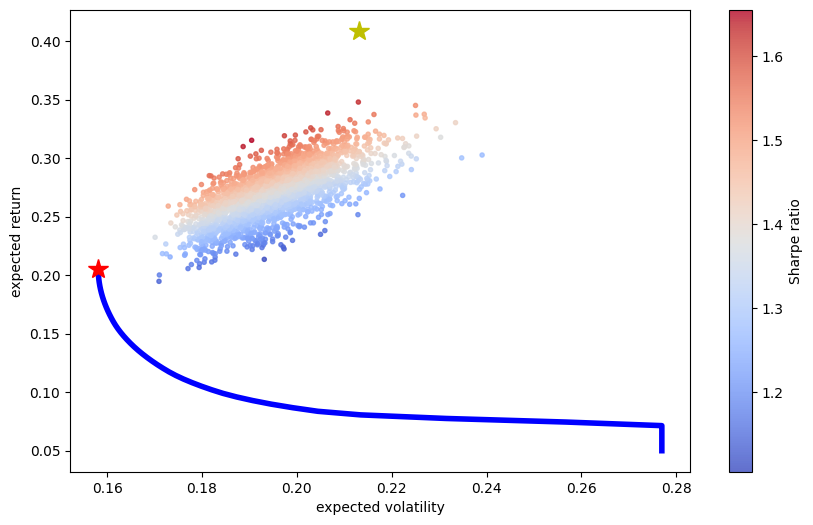

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']), 'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']), 'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

# Capital Market Line

In [ ]:
import scipy.interpolate as sci

In [ ]:
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

In [ ]:
tck = sci.splrep(evols, erets)

TypeError: m > k must hold

In [ ]:
def f(x):
  return sci.splev(x, tck, der=0)
def df(x):
  return sci.splev(x, tck, der=1)

In [ ]:
def equations(p, rf=0.01):
  eq1 = rf - p[0]
  eq2 = rf + p[1] * p[2] - f(p[2])
  eq3 = p[1] - df(p[2])
  return eq1, eq2, eq3

In [ ]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

In [ ]:
opt

In [ ]:
np.round(equations(opt), 6)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=(prets - 0.01) / pvols, marker='.', cmap='coolwarm')
plt.plot(evols, erets, 'b', lw=4.0)
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=1.5)
plt.plot(opt[2], f(opt[2]), 'y*', markersize=15.0)
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - f(opt[2])}, {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
res = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)

In [ ]:
res['x'].round(3)

In [ ]:
port_ret(res['x'])

In [ ]:
port_vol(res['x'])

In [ ]:
port_ret(res['x']) / port_vol(res['x'])